# p.275 연습
감독자의 직무능력평가 데이터를 활용하여 군집분석을 실시하고 결과를 해석하시오.

# Step 0. 패키지 불러오기

In [26]:
# 데이터 구성
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# 한글, 음수 표시
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)
# Scaler
from sklearn.preprocessing import StandardScaler
# 군집 생성
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
# Hierarchical
from sklearn.cluster import AgglomerativeClustering as AC
# KMeans, DBSCAN
from sklearn.cluster import KMeans, DBSCAN
# silhouette
from sklearn.metrics import silhouette_samples, silhouette_score
# silhouette계수 시각화
from yellowbrick.cluster import SilhouetteVisualizer
# 경고 메시지
import warnings
warnings.filterwarnings('ignore')

# Step 1. 데이터 불러오기

### 데이터 불러오기

In [9]:
df_raw = pd.read_csv('../0_raw_data/직무능력평가.csv')
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


# Step 2. 데이터 전처리

### Scaling

In [11]:
# StandardScaler
scaler = StandardScaler()
df_raw_scaled = scaler.fit_transform(df_raw)
df_raw_scaled[:5]

array([[-1.8076031 , -1.19166169, -1.92300586, -1.50494461, -0.35542617,
         1.77141034,  0.20430138],
       [-0.13647543, -0.19861028, -0.17733772, -0.20508842, -0.15977874,
        -0.18159526,  0.4020124 ],
       [ 0.53197564,  0.25972114,  1.23582221,  1.09476777,  1.11192959,
         1.15467173,  0.50086791],
       [-0.30358819, -0.27499885, -0.67610004, -0.81168798, -1.0401922 ,
         0.9490922 , -0.78425369],
       [ 1.36753948,  0.87082969,  0.23829756,  0.83479653,  0.622811  ,
         0.84630243,  0.4020124 ]])

In [12]:
# 데이터 분리
df_raw_y = df_raw_scaled[:,0]
df_raw_x = df_raw_scaled[:,1::]

### Dendrogram

Text(0, 0.5, 'Sample Index')

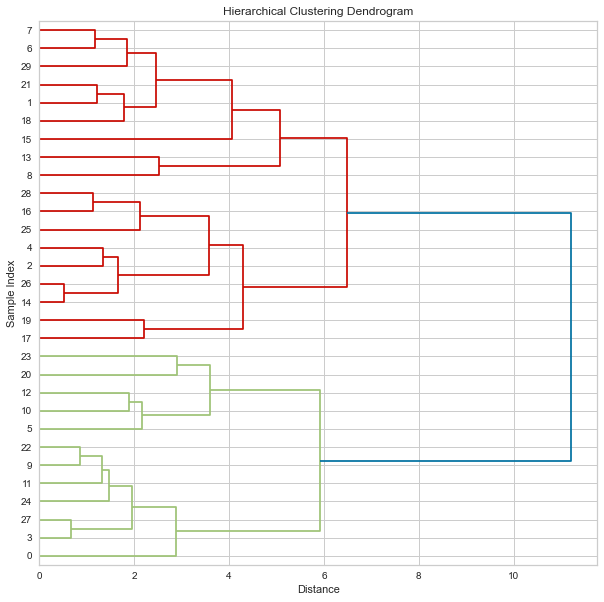

In [13]:
# 연결 : ward, 거리 계산 : Euclidean
Z_ward = linkage(df_raw_x, method = 'ward', metric = 'euclidean')
# 연결 : average, 거리 계산 : Euclidean
Z_average = linkage(df_raw_x, method = 'average', metric = 'euclidean')
# 연결 : average, 거리 계산 : minkowski
Z_Minkowski = linkage(df_raw_x, method = 'average', metric = 'minkowski')
# Dendrogram : Z_ward
plt.figure(figsize = (10,10))
ax = plt.subplot(111)
# DateFrame 변경 : Z_ward
dendrogram(Z_ward, leaf_font_size = 10, orientation = 'right')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Sample Index')

Text(0, 0.5, 'Sample Index')

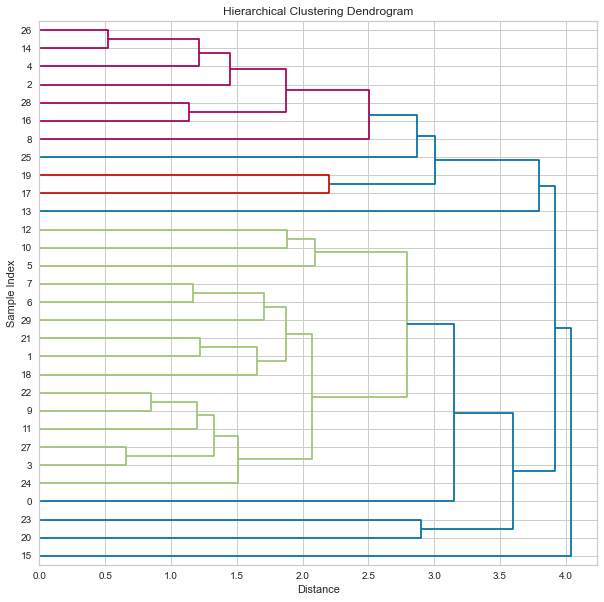

In [14]:
# Dendrogram : Z_average
plt.figure(figsize = (10,10))
ax = plt.subplot(111)
# DateFrame 변경 : Z_average
dendrogram(Z_average, leaf_font_size = 10, orientation = 'right')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Sample Index')

Text(0, 0.5, 'Sample Index')

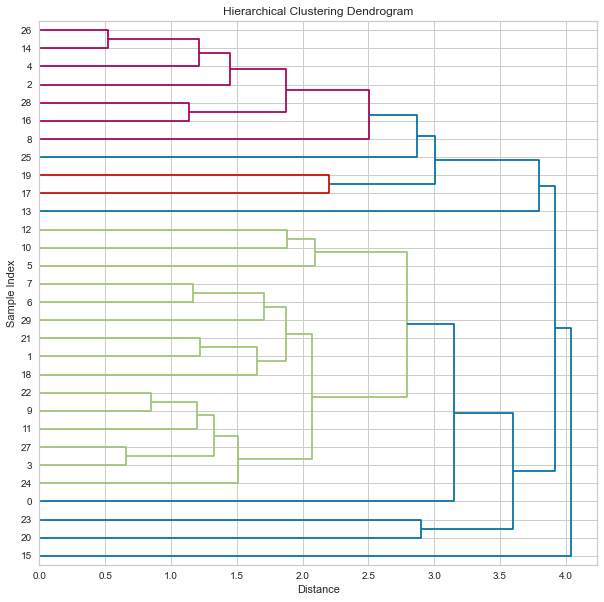

In [15]:
# Dendrogram : Z_Minkowski
plt.figure(figsize = (10,10))
ax = plt.subplot(111)
# DateFrame 변경 : Z_Minkowski
dendrogram(Z_Minkowski, leaf_font_size = 10, orientation = 'right')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Sample Index')

# Step 3. 군집 생성

### Hierarchical

In [16]:
# Z_ward 행렬 데이터를 이용하여 군집 생성
cluster_hierarchical = fcluster(Z = Z_ward, t = 5, criterion = 'distance')
# 결과 입력
df_raw['ClusterHierarchical'] = cluster_hierarchical
# 데이터 요약
summary_hc = df_raw.groupby('ClusterHierarchical').agg(['min','mean','max'])
# 두 줄 한 줄로 반환
level0 = summary_hc.columns.get_level_values(0)
level1 = summary_hc.columns.get_level_values(1)
summary_hc.columns = level0 + '_' + level1
summary_hc.reset_index(inplace = True)
summary_hc.round(4)

,ClusterHierarchical,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,43,57.4286,67,51,58.8571,66,30,43.5714,52,...,50,51,59.4286,66,74,81.1429,92,33,38.5714,45
1,2,40,53.2000,69,37,49.4000,62,33,46.8000,57,...,58,43,52.0000,58,49,60.0000,67,25,35.0000,49
2,3,50,71.8889,85,58,73.8889,85,54,63.3333,71,...,75,55,74.3333,88,74,79.0000,86,46,54.6667,72
3,4,68,70.0000,72,82,82.5000,83,72,77.5000,83,...,67,59,65.0000,71,77,80.0000,83,31,33.0000,35
4,5,58,69.1429,82,61,72.7143,90,39,47.1429,52,...,72,60,66.2857,75,54,72.0000,85,35,40.7143,47


array([[<AxesSubplot:title={'center':'DISSATIS'}, xlabel='ClusterHierarchical'>,
        <AxesSubplot:title={'center':'PRIVILEGE'}, xlabel='ClusterHierarchical'>],
       [<AxesSubplot:title={'center':'CHANCE'}, xlabel='ClusterHierarchical'>,
        <AxesSubplot:title={'center':'ADVANCE'}, xlabel='ClusterHierarchical'>],
       [<AxesSubplot:title={'center':'CRITISM'}, xlabel='ClusterHierarchical'>,
        <AxesSubplot:title={'center':'PROMOTION'}, xlabel='ClusterHierarchical'>]],
      dtype=object)

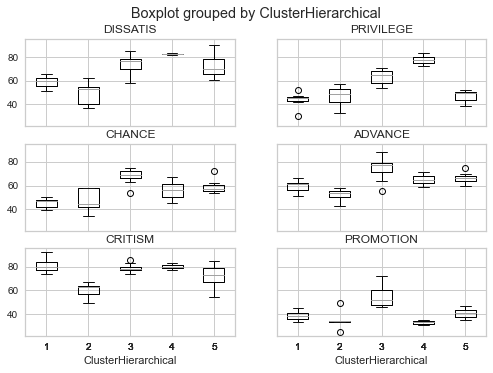

In [17]:
# Boxplot을 활용한 군집별 변수 분포
df_raw.boxplot(column = ['DISSATIS','PRIVILEGE','CHANCE','ADVANCE','CRITISM','PROMOTION'],
               by = 'ClusterHierarchical')

* CHANCE 와 PROMOTION 평균이 상대적으로 높음

<AxesSubplot:title={'center':'EVAL'}, xlabel='ClusterHierarchical'>

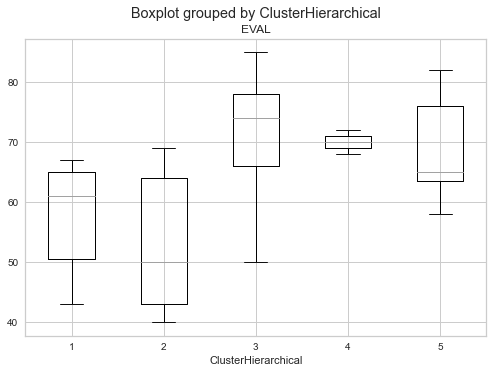

In [18]:
# Boxplot 을 활용한 군집별 목표변수 분포
df_raw.boxplot(column = ['EVAL'], by = 'ClusterHierarchical')

* 3번 군집은 목표변수 평균이 높음

### K-Means

In [21]:
# 최대 군집 생성 개수
n_iter_cluster = 15
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error = []

for v_n_clus in cluster_range :
    clus = KMeans(v_n_clus)
    clus.fit(df_raw_x)
    # 각 데이터로부터 가장 가까운 군집 중심점까지 거리 제곱합
    clus_error.append(clus.inertia_)
# DataFrame 변환
ds_error = pd.DataFrame({'NumberofCluster' : cluster_range, 'Error' : clus_error})
ds_error

,NumberofCluster,Error
0,1,180.000000
1,2,114.082503
2,3,94.505454
3,4,79.209833
4,5,67.833988
5,6,59.755516
6,7,51.629075
7,8,45.673336
8,9,37.338580
9,10,32.793639


Text(0, 0.5, 'Sum of squared distance')

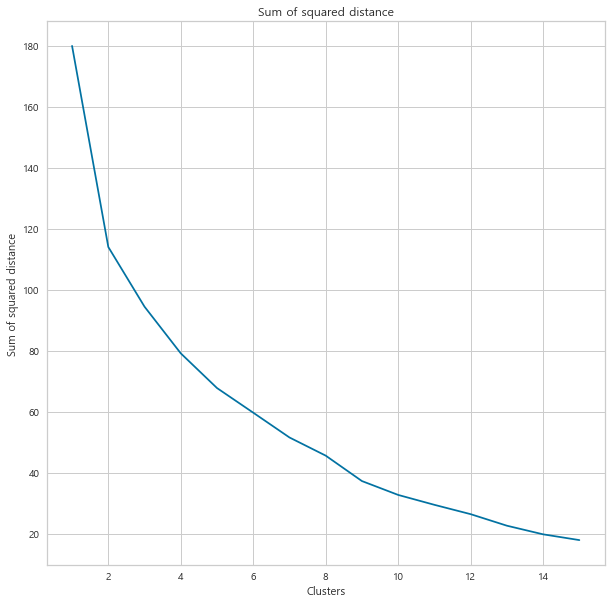

In [22]:
# 군집별 중심점까지의 거리 제곱합을 시각화
plt.figure(figsize = (10,10))
plt.plot(ds_error['NumberofCluster'], ds_error['Error'])
plt.title('Sum of squared distance')
plt.xlabel('Clusters')
plt.ylabel('Sum of squared distance')

In [23]:
# 군집 번호 생성
clus = KMeans(5)
clus.fit(df_raw_x)
cluster_kmeans = [i+1 for i in clus.labels_]
df_raw['ClusterKmeans'] = cluster_kmeans
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical,ClusterKmeans
0,43,51,30,39,61,92,45,1,3
1,63,64,51,54,63,73,47,5,1
2,71,70,68,69,76,86,48,3,2
3,61,63,45,47,54,84,35,1,3
4,81,78,56,66,71,83,47,3,2


In [24]:
# KMeans 군집별 데이터 요약
summary_km = df_raw.drop('ClusterHierarchical', axis = 1, inplace = False).groupby('ClusterKmeans').agg(['min','mean','max'])
level0 = summary_km.columns.get_level_values(0)
level1 = summary_km.columns.get_level_values(1)
summary_km.columns = level0 + '_' + level1
summary_km.reset_index(inplace = True)
summary_km.round(3)

,ClusterKmeans,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,58,69.143,82,61,72.714,90,39,47.143,52,...,72,60,66.286,75,54,72.000,85,35,40.714,47
1,2,50,71.900,85,58,74.700,85,54,64.200,72,...,75,55,74.000,88,74,79.400,86,31,52.300,72
2,3,43,57.429,67,51,58.857,66,30,43.571,52,...,50,51,59.429,66,74,81.143,92,33,38.571,45
3,4,40,53.200,69,37,49.400,62,33,46.800,57,...,58,43,52.000,58,49,60.000,67,25,35.000,49
4,5,68,68.000,68,83,83.000,83,83,83.000,83,...,45,59,59.000,59,77,77.000,77,35,35.000,35


* 각 군집별 변수 분포가 다른 것을 확인

##### Hierarchical / KMeans 결과 확인

In [33]:
# 군집수 = 3
print('군집수 = 3')
# Hierarchical Silhouette 계수 산출
cls_h = AC(n_clusters = 3).fit_predict(df_raw_x)
sil_score = silhouette_score(df_raw_x, cls_h, metric = 'euclidean')
print('Hierarchical Silhouette = {:.3f}'.format(sil_score))
# KMeans Silhouette 계수 산출 : 군집수 = 3
cls_k = KMeans(3).fit_predict(df_raw_x)
sil_score = silhouette_score(df_raw_x, cls_k)
print('KMeans Silhouette = {:.3f}'.format(sil_score))
# 군집수 = 4
print('\n군집수 = 4')
# Hierarchical Silhouette 계수 산출
cls_h = AC(n_clusters = 4).fit_predict(df_raw_x)
sil_score = silhouette_score(df_raw_x, cls_h, metric = 'euclidean')
print('Hierarchical Silhouette = {:.3f}'.format(sil_score))
# KMeans Silhouette 계수 산출 : 군집수 = 3
cls_k = KMeans(4).fit_predict(df_raw_x)
sil_score = silhouette_score(df_raw_x, cls_k)
print('KMeans Silhouette = {:.3f}'.format(sil_score))

군집수 = 3
Hierarchical Silhouette = 0.187
KMeans Silhouette = 0.248

군집수 = 4
Hierarchical Silhouette = 0.198
KMeans Silhouette = 0.189


* 일반적으로 실루엣 계수가 높을수록 효율적인 군집 분류로 판단
* Hierarchical의 경우 4개, KMeans의 경우 3개가 적절해보임
* 실행마다 값이 변동될 수 있음

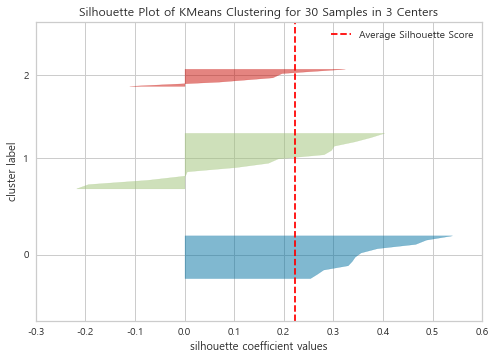

실루엣 계수 = 0.2224


In [37]:
# 시각화
clus = KMeans(3)
graph_sil = SilhouetteVisualizer(clus, colors = 'yellowbrick')
# 데이터 입력
graph_sil.fit(df_raw_x)
graph_sil.show()
print('실루엣 계수 = {:.4f}'.format(graph_sil.silhouette_score_))

### DBSCAN

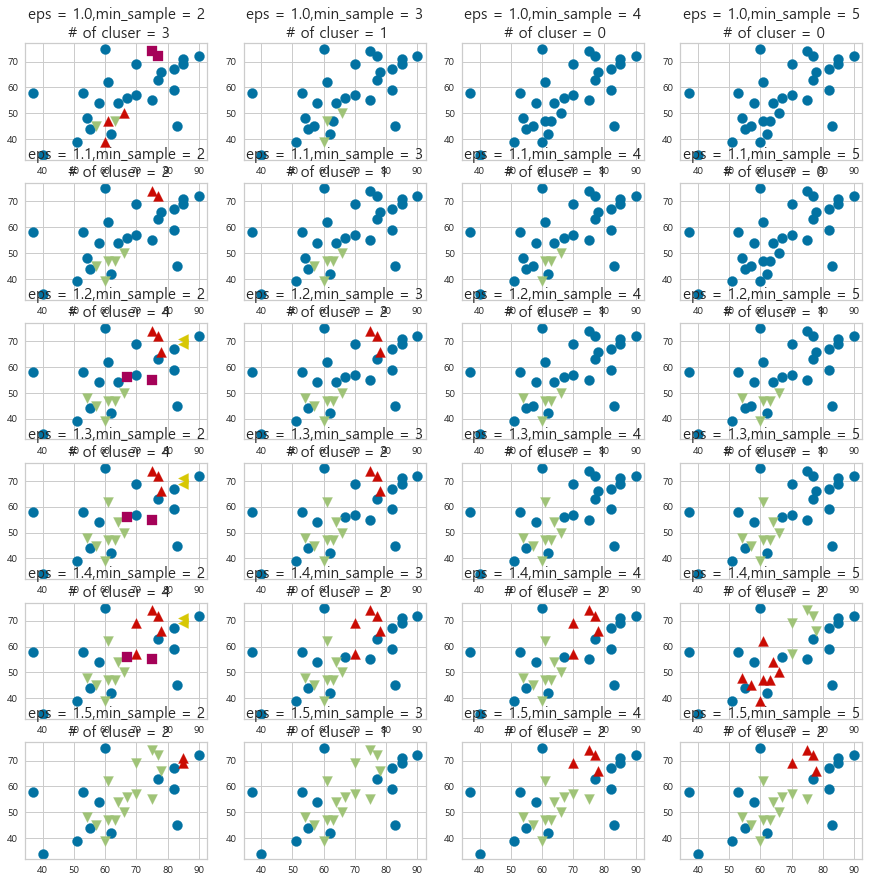

In [38]:
# X축 : DISSATIS, Y축 : CHANCE
X = df_raw['DISSATIS']
Y = df_raw['CHANCE']
# point 종류
markers = ['o','v','^','s','<','>','p','D']
# eps : 특정 데이터로부터 다른 데이터를 포함하는 거리
para_eps = [k/10 for k in range(10,16,1)]
# min_sample : 군집이 되기 위한 최소 데이터 수
para_min_sample = range(2,6)
# 시각화
fig, axes = plt.subplots(len(para_eps), len(para_min_sample),figsize = (15,15))
# index 값 순차적으로반환
for i,eps in enumerate(para_eps) :
    for j,min_sample in enumerate(para_min_sample) :
        dbscan = DBSCAN(min_samples = min_sample, eps = eps) # dbscan 실행
        clusters = dbscan.fit_predict(df_raw_x) # 예측 분류
        clusters = clusters + 1 # noise의 경우 -1 로 표기되므로 1씩 더하여 0으로 반환
        for (n_clus,clus) in enumerate(range(min(clusters), max(clusters)+1,1)) : # 군집별 다른 그림 지정
            axes[i,j].scatter(X[clusters == clus],Y[clusters == clus],marker = markers[n_clus],s=100)
            axes[i,j].set_title('eps = '+str(eps)+',min_sample = '+str(min_sample)+'\n # of cluser = '+str(max(clusters)),fontsize = 15)

* 거리가 길고(eps = 1.4), 최소 자료 수가 적으면(min_sample = 2) 군집이 여러 개 생성
* 거리가 짧고(eps = 1), 최소 자료 수가 많으면(min_sample = 5) 군집이 생성되지 않음

In [40]:
# 군집 결과
dbscan = DBSCAN(eps = 1.4, min_samples = 2).fit(df_raw_x)
cluster_dbscan = dbscan.labels_
# DBSCAN의 Noise 데이터의 경우 군집이 -1로 표시되며 0번 군집부터 시작
for (i,val) in enumerate(cluster_dbscan):
    if val < 0:
        cluster_dbscan[i] = 0
    # Hierarchical, KMeans는 1번 군집부터 시작하므로 DBSCAN의 군집 번호를 다른 군집 번호와 통일
    else:
        cluster_dbscan[i] = cluster_dbscan[i] + 1
# 결괴 확인
df_raw["ClusterDBScan"] = cluster_dbscan
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical,ClusterKmeans,ClusterDBScan
0,43,51,30,39,61,92,45,1,3,0
1,63,64,51,54,63,73,47,5,1,1
2,71,70,68,69,76,86,48,3,2,2
3,61,63,45,47,54,84,35,1,3,1
4,81,78,56,66,71,83,47,3,2,2


In [41]:
# DBSCAN 군집별 데이터 요약
summary_dbs = df_raw.drop(['ClusterHierarchical','ClusterKmeans'], axis = 1, inplace = False).groupby('ClusterDBScan').agg(['min','mean','max'])
level0 = summary_dbs.columns.get_level_values(0)
level1 = summary_dbs.columns.get_level_values(1)
summary_dbs.reset_index(inplace=True)
summary_dbs.round(3)

ClusterDBScan EVAL            DISSATIS             PRIVILEGE              \
                 min   mean max      min    mean max       min    mean max   
0             0   40  61.00  82       37  63.846  90        30  54.385  83   
1             1   48  60.75  67       54  60.750  66        42  47.250  52   
2             2   65  74.40  81       70  74.000  78        46  56.400  68   
3             3   58  64.50  71       67  71.000  75        42  46.000  50   
4             4   74  79.50  85       85  85.000  85        64  67.500  71   

   ... CHANCE ADVANCE             CRITISM             PROMOTION              
   ...    max     min    mean max     min    mean max       min    mean max  
0  ...     75      43  60.154  88      49  70.615  92        25  41.923  72  
1  ...     62      51  60.500  66      73  78.625  84        33  39.125  47  
2  ...     74      71  76.200  80      77  81.800  86        46  47.200  49  
3  ...     56      66  68.000  70      66  67.000  68        35  38.000  41  
4  ...     71      77  78.000  79      74  76.500  79        55  59.000  63  

[5 rows x 22 columns]

* 각 군집별 변수 분포가 다른 것을 확인